# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [18]:
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [9]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


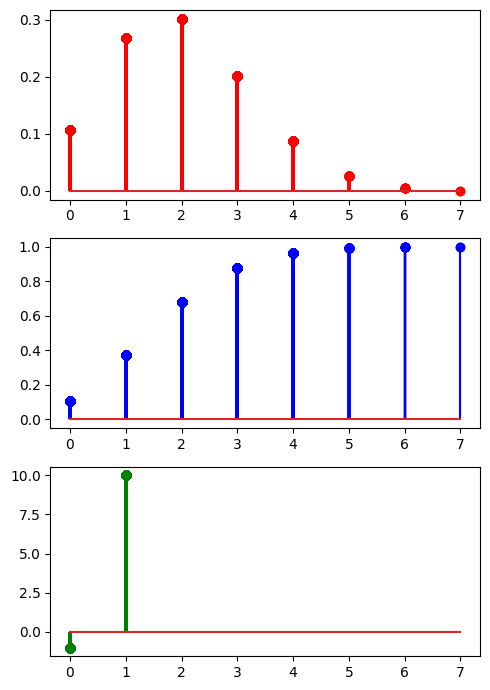

In [14]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## Distribuición Normal

In [8]:
# Calcula Densidad de probabilidad
def dnorm(x, mean=0, sd=1):
    return norm.pdf(x, loc=mean, scale=sd)

# Calcula la distribución acumulativa
def pnorm(a, mean=0, sd=1):
    return norm.cdf(a, loc=mean, scale=sd)

# Calcula el percentual
def qnorm(p, mean=0, sd=1):
    return norm.ppf(p, loc=mean, scale=sd)

# Genera variables aleatorias
def rnorm(n, mean=0, sd=1):
    return norm.rvs(loc=mean, scale=sd, size=n)

In [10]:
# Distribución normal (equivalente a Binomial(n=10, p=0.2))
media = 2 # Media=n*p
desviacion = np.sqrt(10 * 0.2 * 0.8) # raiz cuadrada de (n * p * (1 - p))

np.random.seed(42)

print(f"Densidad de probabilidad en x = 2: {norm.pdf(2, loc=media, scale=desviacion)}")
print(f"Probabilidad de que la normal tome un valor menor a 2: {norm.cdf(2, loc=media, scale=desviacion)}")
print(f"Qué valor tiene una probabilidad acumulada de 0.9?: {norm.ppf(0.9, loc=media, scale=desviacion)}")
print(f"Generar 2000 valores aleatorios de una normal: {norm.rvs(loc=media, scale=desviacion, size=2000)}")

Densidad de probabilidad en x = 2: 0.31539156525252005
Probabilidad de que la normal tome un valor menor a 2: 0.5
Qué valor tiene una probabilidad acumulada de 0.9?: 3.621048754430201
Generar 2000 valores aleatorios de una normal: [2.62829923 1.82510796 2.8192684  ... 0.884507   1.79373479 1.0577644 ]


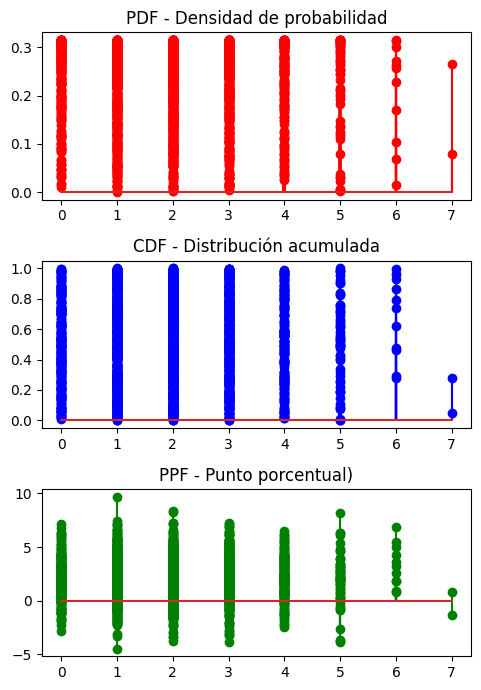

<Figure size 640x480 with 0 Axes>

In [17]:
# Graficos de las distribuiciones normales
np.random.seed(42)
media = 2
desviacion = np.sqrt(10 * 0.2 * 0.8)

# Generar 2000 valores aleatorios
data_normal = norm.rvs(loc=media, scale=desviacion, size=2000)

# Calcular las funciones
pdf = norm.pdf(data_normal, loc=media, scale=desviacion)  # Densidad
cdf = norm.cdf(data_normal, loc=media, scale=desviacion)  # Acumulada
ppf = norm.ppf(norm.cdf(data_normal, loc=media, scale=desviacion), loc=media, scale=media)  # Pecentual

# Graficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].stem(data, pdf, linefmt="r-")
axis[0].set_title("PDF - Densidad de probabilidad")

axis[1].stem(data, cdf, linefmt="b-")
axis[1].set_title("CDF - Distribución acumulada")

axis[2].stem(data, ppf, linefmt="g-")
axis[2].set_title("PPF - Punto porcentual)")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## Distribuición Uniforme


In [19]:
# Calcula la densidad
def dunif(x, min_val=0, max_val=1):
    return uniform.pdf(x, loc=min_val, scale=max_val - min_val)

# Calcula la distribución acumulativa
def punif(q, min_val=0, max_val=1):
    return uniform.cdf(q, loc=min_val, scale=max_val - min_val)

# Calcula el punto porcentual
def qunif(p, min_val=0, max_val=1):
    return uniform.ppf(p, loc=min_val, scale=max_val - min_val)

# Genera variables aleatorias
def runif(n, min_val=0, max_val=1):
    return uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)

In [21]:
# Distribuición Uniforme
a = 0   # mínimo
b = 10  # máximo
loc = a
scale = b - a

print(f"Densidad de probabilidad en x = 2: {uniform.pdf(2, loc=loc, scale=scale)}")
print(f"Probabilidad de que sea menor o igual 2: {uniform.cdf(2, loc=loc, scale=scale)}")
print(f"Qué valor tiene una probabilidad acumulada de 0.9?: {uniform.ppf(0.9, loc=loc, scale=scale)}")
print(f"Generar 2000 valores aleatorios de una distribución uniforme: {uniform.rvs(loc=loc, scale=scale, size=2000)}")

Densidad de probabilidad en x = 2: 0.1
Probabilidad de que sea menor o igual 2: 0.2
Qué valor tiene una probabilidad acumulada de 0.9?: 9.0
Generar 2000 valores aleatorios de una distribución uniforme: [6.68876531 7.9865578  9.32752939 ... 0.86116111 5.59136656 5.02783442]


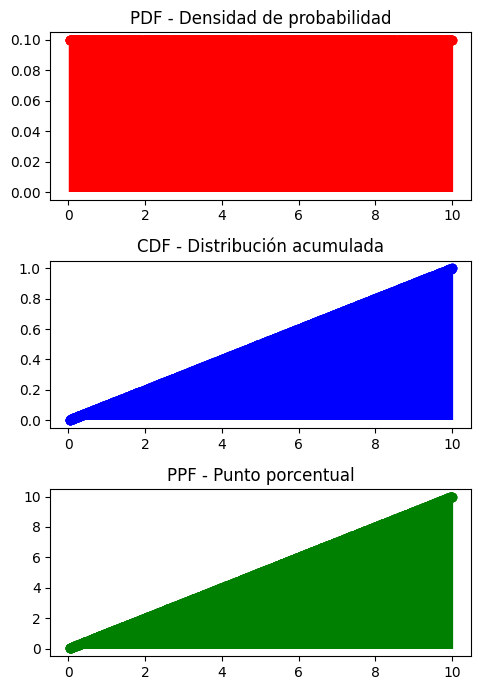

In [22]:
# Graficos de la distribuición uniform
np.random.seed(42)

# Generar 2000 variables aleatorias
data_uniform = uniform.rvs(loc=loc, scale=scale, size=2000)

# Calcular funciones
pdf = uniform.pdf(data_uniform, loc=loc, scale=scale)
cdf = uniform.cdf(data_uniform, loc=loc, scale=scale)
ppf = uniform.ppf(uniform.cdf(data_uniform, loc=loc, scale=scale), loc=loc, scale=scale)

# Gráficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].stem(data_uniform, pdf, linefmt="r-", basefmt=" ")
axis[0].set_title("PDF - Densidad de probabilidad")

axis[1].stem(data_uniform, cdf, linefmt="b-", basefmt=" ")
axis[1].set_title("CDF - Distribución acumulada")

axis[2].stem(data_uniform, ppf, linefmt="g-", basefmt=" ")
axis[2].set_title("PPF - Punto porcentual")

plt.tight_layout()
plt.show()